# First Project

## Introduction
In the first assignment, I will be modeling a bus system that takes into account a variety of inputs to try to mimic what a real world scenario would look like computationally. The purpose of the project is not to achieve perfection with aspect to reality, but to create a system that can have meaningful analyses extracted out of it. 

## Feedback
I would like feedback on how well I implemented the assumptions. I know that the assumptions are given as quantitative values, and thus it makes things less black and white, but I still think that it is imperative for me to apply these assumptions in a cohesive way, such that the results are harmonious and the analysis is effective.

## Basic Model and Assumptions
A circular bus route operates 24 hours per day. The buses on the route allow passengers to embark and disembark at 15 different stops before looping back to the start of the route. At each bus stop, passengers wait until the next bus arrives, get on the bus, and finally get off the bus at their chosen destination. The rate at which passengers join the queue at a bus stop is constant and does not depend on the time of day.

The time (in minutes) between consecutive passengers joining a queue at each bus stop is assumed to come from an exponential distribution with rate parameter λ = 1. Each passenger chooses uniformly at random a destination that is at most 7 stops away from where they start.

When a bus stops, the time (in minutes) it takes passengers to disembark is normally distributed with mean μ=0.03n and standard deviation = 0.01√n where n is the number of passengers who want to disembark. 

The time it takes passengers in the queue to get on the bus is also normally distributed with mean μ2 = 0.05n and standard deviation σ2 = 0.01√n. No passengers can embark while other passengers are still disembarking.

The maximum capacity of each bus is 130 passengers. If the bus is full, no more passengers can embark and they have to wait for the next bus to arrive.
The travel time of the bus between consecutive bus stops follows a normal distribution with parameters μ minutes and minutes. 

With all this being listed, we can start discussing some of the initial experimentation.


## Initial Experiments
The most appropriate theory to use in this scenario would be the queueing theory, and one of the principles taught by queuing theory is M/G/1. In basic terms, this model is follows markovian arrivals - meaning an exponential distribution is used to characterize the models. Service times can be generalized which gives greater freedom to experiment.

Such is the case that arrival time can be denoted by lambda. λ=1 mean an arrival rate of one.
The arrival distribution can be written down as an exponential of 1/λ.

The 15 bus stops could be initialized as a list. It is important that some sort of periodic boundary is set since the bus can go from stop 15 to stop 1 (or Python indexing). This would result in the bus completing the circle properly. 

Since the instructions say that the passengers choose from a uniform distribution any stop that is not the same one (so that queueing is not redundant), we can initialize the travel in this way.

In [20]:
import random
embarking_stop = random.randint(0,14)
destination_stop = (embarking_stop + random.randint(1,7)) % 15
print("The passenger got on at stop", embarking_stop, "and got off at stop", destination_stop)

The passenger got on at stop 7 and got off at stop 14


The trickier part is discerning how many people get on and off at each stop. Since the total capacity is 130, we have to ensure that a reasonable amount of people are embarking and disembarking since this will govern the total wait times for people that are queued. 

In [31]:
import numpy as np
from math import sqrt
import math
import statistics
import matplotlib.pyplot as plt

# Disembarking
# Assumption that the bus is full
capacity = 130

# total passengers who get off
disembarking_passengers = random.randint(0, capacity*0.5)

available_seats_after = capacity - disembarking_passengers
time_to_disembark = np.random.normal(loc=0.03 * disembarking_passengers, scale=0.01 * sqrt(disembarking_passengers))

One of the assumptions I added in was that at most, half the bus can disembark. This was done since by only setting it to a default disembarkment pattern, up to 80 - 100 people were disembarking at each stop. Since the distribution of people should be somewhat uniform across all stops, we should see the same amount of people coming in and going at roughly all stops. By making this range too high, we might see odd variances with some stops being embarking heavy, while others being disembarking heavy.

In [22]:
# Embarking
queue_length = 25

# only the available seats can be occupied
if available_seats_after < queue_length:
    queue_length = available_seats_after
else:
    embarking_passengers = queue_length

time_to_embark = np.random.normal(loc=0.05 * embarking_passengers, scale=0.01 * sqrt(embarking_passengers))
total_time = time_to_embark + time_to_disembark

# Bus Travel Time
travel_time_between_bus_stops = np.random.normal(loc=2, scale=0.5)


# Average service time between consecutive stops
average_service_time = travel_time_between_bus_stops + total_time


The people who have to embark follow a simple principle - they queue up and take the available seats. If available seats are greater than the queue, everyone joins, otherwise they wait for the next. Embarking happens after disembarking is complete and then the total time is added.

In [23]:
### GUT CHECKS  

#Disembarking
print("A total of", disembarking_passengers, "passengers get off the bus at the following stop.")
print("It takes", disembarking_passengers, "passengers", time_to_disembark, "minutes to get off the bus.")
print("There are", available_seats_after, "seats available after people get off.")

#Embarking gut checks
print(embarking_passengers, "embark the bus in", time_to_embark, "minutes.")
print("Passengers in the queue have to wait", time_to_disembark, "minutes before they can embark.")
print("The total time taken to embark for", embarking_passengers, "passengers is", total_time, "minutes.")

#Travel between stops
print("The travel time between bus stops is", travel_time_between_bus_stops, "Minutes")

#Average service time
print("The average service time between two stops is", average_service_time)

A total of 52 passengers get off the bus at the following stop.
It takes 52 passengers 1.585079200426274 minutes to get off the bus.
There are 78 seats available after people get off.
25 embark the bus in 1.2843606890896042 minutes.
Passengers in the queue have to wait 1.585079200426274 minutes before they can embark.
The total time taken to embark for 25 passengers is 2.869439889515878 minutes.
The travel time between bus stops is 1.43233787617724 Minutes
The average service time between two stops is 4.301777765693118


## Discussion
On initial reflection, this seems to be working fine. The number of passengers disembarking will vary and there will be some randomness to it, but people embarking will take empty spots so there will always be this dynamic growth and decline of passengers inside the bus. The more important part is the timing of the embarking, disembarking and travel. I think 52 passengers getting off in 1.6 minutes is a little too fast, but it follows the distribution given to us in the instructions. 25 people getting on in 1.28 minutes is also quite fast but this does not take into consideration the passengers sitting down and stuff. For them to wait in queue and then in total take 2.86 minutes to embark is realistic. For now, the initial assumptions serve their purpose.

In [48]:
service_time = []
total_time_queue = []

for i in range(10000):
    capacity = 130
    occupied = random.randint(0, capacity)
    # total passengers who get off
    disembarking_passengers = random.randint(0, math.floor(occupied*0.5))
    available_seats_after = occupied - disembarking_passengers
    time_to_disembark = np.random.normal(loc=0.03 * disembarking_passengers, scale=0.01 * sqrt(disembarking_passengers))
    
    # Embarking
    queue_length = random.randint(0,10)

    # only the available seats can be occupied
    if available_seats_after < queue_length:
        queue_length = available_seats_after
    else:
        embarking_passengers = queue_length

    time_to_embark = np.random.normal(loc=0.05 * embarking_passengers, scale=0.01 * sqrt(embarking_passengers))
    total_time = time_to_embark + time_to_disembark

    # Bus Travel Time
    travel_time_between_bus_stops = np.random.normal(loc=2, scale=0.5)


    # Average service time between consecutive stops
    average_service_time = travel_time_between_bus_stops + total_time

    # time waiting
    waiting_time = travel_time_between_bus_stops + time_to_disembark

    service_time.append(average_service_time)
    total_time_queue.append(waiting_time)

mu = statistics.mean(service_time)
sigma_stdev = statistics.stdev(service_time)

print(mu)
print(statistics.mean(total_time_queue))



2.7271564235313175
2.4836486359237275


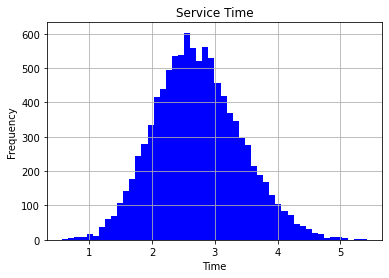

In [50]:
# Service time
n, bins, patches = plt.hist(service_time, 50, density=False, facecolor='b')

plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Service Time')
plt.grid(True)
plt.show()

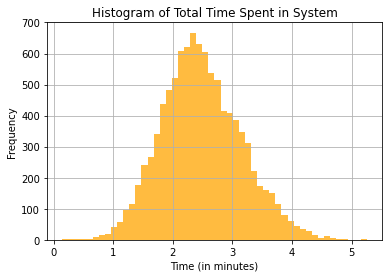

In [49]:
# Total queued time
n, bins, patches = plt.hist(total_time_queue, 50, density=False, facecolor='orange', alpha=0.75)

plt.xlabel('Time (in minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Total Time Spent in System')
plt.grid(True)
plt.show()

By repeating the same experiment 10000 times we can get a mean value for time spent in the queue and total time spent in the system. This will be helpful for us to analyze an M/G/1 system as it will provide the inputs needed to implement.

In [73]:
from tqdm import tqdm
import scipy.stats as sts

average_arrival_rate = 1
arrival_distribution = sts.expon(scale=1/average_arrival_rate)

time_to_disembark = np.random.normal(loc=0.03 * disembarking_passengers, scale=0.01 * sqrt(disembarking_passengers))
time_to_embark = sts.norm(loc=0.05 * embarking_passengers, scale=0.01 * sqrt(embarking_passengers))
travel_time_between_bus_stops = sts.norm(loc=2, scale=0.5)

tau = 1/mu
sigma = sigma_stdev
service_distribution = sts.norm(loc=tau, scale=sigma)

# service_distribution = sts.expon(scale=1/1)
bus_system = run_simulation(arrival_distribution, service_distribution, run_until=100)
print(f'There is/are {bus_system.queue.people_in_queue} people in the queue')

print(f'Being served: {bus_system.queue.people_being_served}')
#print(f'Waiting: {bus_system.queue[1].people_being}')
#print(f'#Off: {bus_system.queue[1].people_disembarked} disembarked customers')

There is/are 2 people in the queue
Being served: 1


In [59]:
def run_experiment(arrival_rate_list, service_time_dist, run_until, num_trials):
    '''
    Run an experiment with different arrival rates for an M/G/1 queue. By
    setting the service time distribution appropriately, you can also simulate
    M/D/1 and M/M/1 queues.
    '''
    
    # We record only the mean and standard error of the mean for each experiment
    results_mean = []
    results_std_err = []

    for arrival_rate in tqdm(arrival_rate_list):
        arrival_distribution = sts.expon(scale=1/arrival_rate)
        queue_lengths = []
        for trial in range(num_trials):
            bus_system = run_simulation(
                arrival_distribution, service_time_dist, run_until)
            queue_lengths.append(bus_system.queue.people_in_queue)
        results_mean.append(np.mean(queue_lengths))
        results_std_err.append(sts.sem(queue_lengths))
        
    # Convert lists to arrays so we can easily add, subtract, and multiply them
    results_mean = np.array(results_mean)
    results_std_err = np.array(results_std_err)
    
    return results_mean, results_std_err


def make_error_plot(queue_type, rho, mean, std_err, theoretical_function):
    '''
    Plot the empirical mean and 95% confidence interval of the mean of the queue
    length. Also plot the theoretical value for the average queue length using the
    supplied theoretical function (a function of rho).
    '''
    
    plt.figure(figsize=(8, 6))
    plt.title(f'Average queue length for an {queue_type} queue')
    plt.xlabel('utilization ρ')
    plt.ylabel('average queue length')

    plt.errorbar(
        rho, mean, 1.96 * std_err,
        color='black', marker='o', capsize=5, linestyle='--', linewidth=1,
        label='empirical')

    plt.plot(
        rho, theoretical_function(rho),
        color='red', marker='o', linestyle='--', linewidth=1,
        label='theoretical')

    plt.legend()
    plt.show()


In [60]:
np.random.seed(123)
arrival_rate_list = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 0.95])

run_until = 300
num_trials = 100
mg1_mean, mg1_std_err = run_experiment(arrival_rate_list, service_distribution, run_until, num_trials)
print('\nM/G/1 experiment complete')


100%|██████████| 6/6 [00:28<00:00,  4.67s/it]


M/G/1 experiment complete


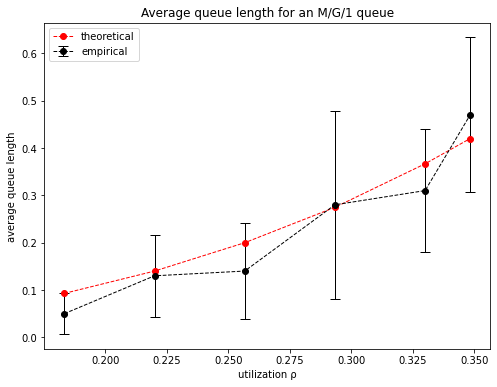

In [61]:
def theoretical_mg1(rho):
    return rho**2 / 2 / (1-rho) * (1 + sigma**2 / tau**2)

rho = arrival_rate_list * tau
make_error_plot('M/G/1', rho, mg1_mean, mg1_std_err, theoretical_mg1)

The experimentation and implementation of a basic level of the model is done to theoretically analyze how the M/G/1 implementation may look like. I have done some experiments which showcase that the queue length should stay in control if the utilization rate remains within the bounds specified.

# The Model

In [7]:
import heapq
import scipy.stats as sts
import random as rd


## Taken from class
class Event:
    '''
    Store the properties of one event in the Schedule class defined below. Each
    event has a time at which it needs to run, a function to call when running
    the event, along with the arguments and keyword arguments to pass to that
    function.
    '''
    def __init__(self, timestamp, function, *args, **kwargs):
        self.timestamp = timestamp
        self.function = function
        self.args = args
        self.kwargs = kwargs

    def __lt__(self, other):
        '''
        This overloads the less-than operator in Python. We need it so the
        priority queue knows how to compare two events. We want events with
        earlier (smaller) times to go first.
        '''
        return self.timestamp < other.timestamp

    def run(self, schedule):
        '''
        Run an event by calling the function with its arguments and keyword
        arguments. The first argument to any event function is always the
        schedule in which events are being tracked. The schedule object can be
        used to add new events to the priority queue.
        '''
        self.function(schedule, *self.args, **self.kwargs)


class Schedule:
    '''
    Implement an event schedule using a priority queue.
    
    The `now` attribute contains the time at which the last event was run.
    '''
    
    def __init__(self):
        self.now = 0  # Keep track of the current simulation time
        self.priority_queue = []  # The priority queue of events to run
    
    def add_event_at(self, timestamp, function, *args, **kwargs):
        # Add an event to the schedule at a particular point in time.
        heapq.heappush(
            self.priority_queue,
            Event(timestamp, function, *args, **kwargs))
    
    def add_event_after(self, interval, function, *args, **kwargs):
        # Add an event to the schedule after a specified time interval.
        self.add_event_at(self.now + interval, function, *args, **kwargs)
    
    def next_event_time(self):
        return self.priority_queue[0].timestamp

    def run_next_event(self):
        # Get the next event from the priority queue and run it.
        event = heapq.heappop(self.priority_queue)
        self.now = event.timestamp
        event.run(self)
        
    def __repr__(self):
        return (
            f'Schedule() at time {self.now} ' +
            f'with {len(self.priority_queue)} events in the queue')
    
    def print_events(self):
        print(repr(self))
        for event in sorted(self.priority_queue):
            print(f'   {event.timestamp}: {event.function.__name__}')

In [52]:
class Queue:
    def __init__(self):
        
        # We start with an empty queue and the server not busy
        self.people_in_queue = 0
        
    def add_customer(self):
        # Add the customer to the queue
        self.people_in_queue += 1
        # n people being served get removed from the queue
    def serve(self,n):
        self.people_in_queue -= n
        
  
class Busses:
    def __init__(self,embarking_stop,total_stops=15,
                 travel_time_between_bus_stops=sts.norm(loc=2,scale=0.5),
                 time_to_embark=sts.norm(loc = 0.03, scale = 0.01),
                 time_to_disembark=sts.norm(loc=0.05, scale=0.01),capacity=130):
      
          # initialize with the inputs chosen for the model
        self.nPassengers = 0
        self.total_stops = total_stops  
        self.cStop = embarking_stop  
        self.travel_time_between_bus_stops = travel_time_between_bus_stops
        self.capacity = capacity  
        self.time_to_embark = time_to_embark
        self.time_to_disembark = time_to_disembark
        self.stops = {i:0 for i in range(total_stops)} 
      

    def embark(self, *args):
        """adds people to the bus"""

        
        schedule = args[0]
        busSystem, stop= args[1]

        # only the available seats can be occupied by waiting passengers
        # kk = int(self.nPassengers)
        n = busSystem.queue[stop].people_in_queue 
        if n + self.nPassengers > self.capacity:
            n = self.capacity - self.nPassengers
        self.nPassengers += n

        jj = int(self.nPassengers)
        # print('-----', (jj-kk == n))

        # selecting a random stop at maximum 7 stops away as the destination
        for x in range(n):
            trip = stop + round(rd.random()*7)
            if trip > self.total_stops-1:
                trip -= self.total_stops
            self.stops[stop] += 1

        busSystem.queue[stop].serve(n) 

       
        schedule.add_event_after(
            self.travel_time_between_bus_stops.rvs()+self.time_to_embark.rvs()*n,
            self.disembark, (busSystem, self.cStop+1))


    def disembark(self, *args):
        """takes people out of the bus"""

        
        schedule = args[0]
        busSystem, stop= args[1]

        # circular path
        if stop > self.total_stops-1:
            stop -= self.total_stops
        self.cStop = int(stop)

        # passengers getting off
        n = int(self.stops[stop])

        new_var = int(self.nPassengers)

        # removes them
        self.nPassengers -= n
        self.stops[stop] = 0 


        new_var_2 = int(self.nPassengers)
        #print(new_var_2 + n == new_var)

        # scheduling the disembarking
        schedule.add_event_after(
            self.time_to_disembark.rvs()*n,
            self.embark, (busSystem, self.cStop))




In [80]:
class BusSystem:
    
    def __init__(self, buses, arrival_distribution=sts.expon(scale=1), service_distribution=sts.norm(loc=2, scale=0.5),
                 stops=15):
        self.queue = {i:Queue() for i in range(stops)}
        self.arrival_distribution = arrival_distribution
        self.service_distribution = service_distribution
        self.stops = stops
        self.busses = {i:Busses(0) for i in range(buses)}

    def add_customer(self, *args):
        
        queue, schedule = args[1]
        # add another customer
        self.queue[queue].add_customer()
        
       
        schedule.add_event_after(
            self.arrival_distribution.rvs(),
            self.add_customer, (queue, schedule))

    def run(self, schedule):
        # first customer arriving
        for i in range(self.stops):
            schedule.add_event_after(
                self.arrival_distribution.rvs(),
                self.add_customer, (i, schedule))

        # initialization of bus leaving
        for i,bus in self.busses.items():
            schedule.add_event_after(
                self.service_distribution.rvs()*(i+1),
                bus.embark, (self,0))
        

def run_simulation(n_busses, run_until):
    """runs the simulation, outputing the total number of people waiting at each timestamp"""
    schedule = Schedule()
    bus_system = BusSystem(n_busses)
    bus_system.run(schedule)
    people_waiting = []
    wait_time = []
    while schedule.next_event_time() < run_until:
        schedule.run_next_event()
        wait_time.append([i[1].people_in_queue for i in bus_system.queue.items()])
        people_waiting.append(sum([bus_system.queue[i].people_in_queue for i in range(len(bus_system.queue))]))
    return people_waiting, wait_time

## Discussion
The model is created to serve a simple purpose. The bus system is defined using busses, queues, events and the schedule. The bus governs most of the operations as it defines how people embark and disembark. In simple, FIFO is followed and people add queues uniformly and randomly. The BusSystem class uses the assumptions and equations specified to run the entire process.

average total number of people wating:  163.2004925097476


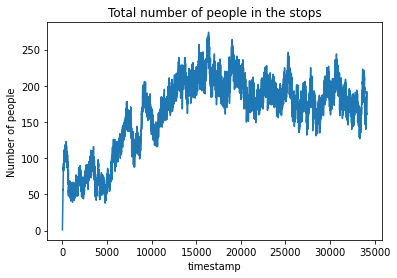

In [58]:
import seaborn as sns
import numpy as np
y=run_simulation(i, 1500)

print('average total number of people wating: ', np.mean(y))

sns.lineplot(x=range(len(y)), y=y)
plt.title('Total number of people in the stops')
plt.xlabel('timestamp')
plt.ylabel('Number of people')
plt.show()

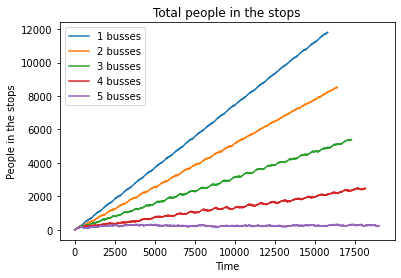

In [191]:
import matplotlib.pyplot as plt
n = 5
initial = 1
runs = []
wait = []
for i in range(initial, n+1):
  x, y = run_simulation(i, 1000)
  runs.append(x)
  wait.append(y)


for i,_ in enumerate(runs):
    plt.plot(range(len(_)), _, label=f'{i+initial} busses')

plt.legend()
plt.xlabel('Time')
plt.ylabel('People in the stops')
plt.title('Total people in the stops')
plt.show()

In [193]:
def get_waiting_time_single_stop(queue):
  waits = []
  i = 0
  curr_time = 0
  people_left = queue[0]
  last_in = 0
  last_n_people = 0
  # last_in_n_people = 0
  for j in range(len(queue)-1):
    if queue[j+1] - queue[j]  ==  0:
      curr_time += 1
      continue
    elif queue[j+1] - queue[j] < 0:
      curr_time += 1
      for k in range(abs((queue[j+1] - queue[j]))):
        if people_left > 0:
          waits.append(curr_time)
          people_left -= 1
        else:
          curr_time = (curr_time + last_in)
          #print(curr_time, last_in_is, last_in, last_in_curr_i)
          waits.append(curr_time)
          people_left = last_n_people
          
      # if people_left - abs((queue[j+1] - queue[j])) > 0:
      #   people_left -= abs((queue[j+1] - queue[j]))
      # else:
      #   curr_time = last_in
    elif queue[j+1] - queue[j] > 0:
      # last_in_curr_i = last_in_is[last_in_curr_i+1]
      last_in = j
      last_n_people = abs(queue[j+1] - queue[j])
      # last_in_n_people = abs(queue[j+1] - queue[j])
      curr_time += 1
  return waits

def get_waiting_time(stop_queues):
  '''
  For a given list of queues, with each element representing the number of people in queue for each stop over time, 
  return the expected value and 95% CI for that list of queues representing one full simulation for a given
  number of busses
  '''
  all_waits = []
  for stop in stop_queues:
    print(get_waiting_time_single_stop(stop))
    all_waits.append(get_waiting_time_single_stop(stop))
  all_waits = np.array(all_waits)
  all_waits = all_waits.flatten()
  # print(all_waits)
  if all_waits != []:
    return np.mean(all_waits)
  else:
    return 0

for n in range(10):
  rows = []
  new = np.array(waits[n])
  for j in range(15):
    rows.append(new[:,j])
  vals = get_waiting_time(rows)
  print(vals)


[49, 640, 2424, 3081, 6210, 6852, 11152, 11814, 17390, 18031, 24909, 25544, 33555, 34189, 43642, 44385, 55256, 55968, 68093, 68725, 82052, 82751, 97456, 98025, 113951]
[137, 137, 200, 200, 1429, 1429, 2071, 2071, 3885, 3885, 5109, 5109, 7658, 7658, 9553, 9553, 12697, 12697, 15196, 15196, 18979, 18979, 22139, 22139, 26533, 26533, 30315, 30315, 35387, 35387, 39813, 39813, 45455, 45455, 50490, 50490, 56777, 56777, 62426, 62426, 69373, 69373, 75671, 75671, 83214, 83214, 90147, 90147, 98216, 98216, 105708, 105708, 114492, 114492, 122636, 122636, 132134, 132134, 140949, 140949, 151250, 151250, 160810, 160810, 171667, 171667, 181879, 181879, 193541, 193541, 204471, 204471, 216636, 216636, 228190, 228190, 241047, 241047, 253255, 253255, 266602, 266602, 279375, 279375, 293523, 293523, 306977, 306977, 321707, 321707, 335811, 335811, 351074, 351074, 365751, 365751, 381663, 381663, 396957, 396957]
[195, 195, 276, 276, 357, 357, 438, 1027, 1720, 1720, 2413, 2413, 3106, 3106, 4943, 4943, 6203, 6203,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


TypeError: ignored

In [194]:
all_maxs = []
for j in range(10):
  maxs = []
  for i in range(len(waits[j])):
    maxs.append(max(waits[j][i]))
  all_maxs.append([j,np.mean(maxs)])


IndexError: ignored

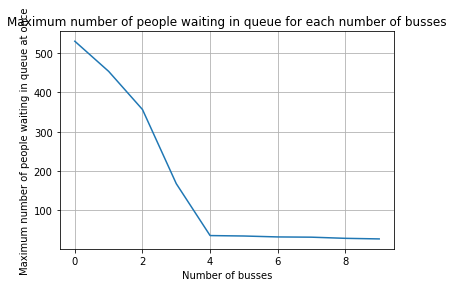

In [189]:
xs = [i[0] for i in all_maxs]
ys = [i[1] for i in all_maxs]
plt.plot(xs, ys)
plt.title("Maximum number of people waiting in queue for each number of busses")
plt.xlabel('Number of busses')
plt.ylabel('Maximum number of people waiting in queue at once')
plt.grid()
plt.show()

# Results

After doing some initial experimentation the results are as following. The number of busses required is between 4 and 5. Up to 500 people can be waiting in queue if only 1 bus is deployed which is a sign of major inefficiency. The average total number of people wating:  163.20, at all times. I struggled really hard with the code for average wait time but I could not crack it. I have left the failed code above but I figured out that the way to do it would be to create a separate Passenger class within the code and use that to track time metrics. Unfortunately I had already taken an extension trying to do this, so did not think it was worthwhile taking another to do. 